In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
from ann_visualizer.visualize import ann_viz
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import activations


I will now load the dataset taken from the UCI machine learning repository. The SUSY Data Set consist in 5000000 instances with events of type signal and background. The attributes of each events are 18: 8 of low-level and 10 of high. The high level ones have been added and computed (as a function of the low-level ones) in order to see if their presence can help the performance of the algorithms chosen to study the problem. 

In [2]:
names=["class label", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi",
                     "lepton 2 pT", "lepton 2 eta", "lepton 2 phi",
                     "missing energy magnitude", "missing energy phi", 
                     "MET_rel", "axial MET","M_R", "M_TR_2", "R", "MT2", "S_R",
                     "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]
df = pd.read_csv('SUSY.csv', 
                 encoding='utf-8', 
                 comment='#',
                 sep=',',
                 names=names)
df.head(10)

,class label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
5,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
6,0.0,0.437818,-1.119883,-1.336823,0.502320,-1.717515,1.017067,0.215619,-0.461200,0.323671,0.173626,0.411898,0.370525,0.798260,0.671369,0.385910,0.515522,0.479110,0.029058
7,0.0,0.571656,0.205696,0.425950,0.578514,0.927399,-1.101478,0.116555,1.549753,0.174421,0.223450,0.523164,0.289889,0.491710,0.334593,0.514246,0.268207,0.315795,0.125728
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
9,0.0,1.001869,-0.471788,0.555614,1.233368,1.255548,-1.052491,0.437615,-1.333052,0.326858,-0.111678,1.435708,0.755201,0.466779,0.454541,1.446331,0.592259,1.325197,0.083014


I study three different models, in order to see to what extent the high-level features add useful information: one with just low-level features (first 8), another with just high-level ones (last 10) and a third one with both of them. 
Hence now i'll define the arrays.

In [3]:
#All features
x=df.iloc[:,1:]
x = x.values


#target
y = df["class label"].values

Below low-level variable are plotted. Those show some of the most distinguishing characteristic of the events.

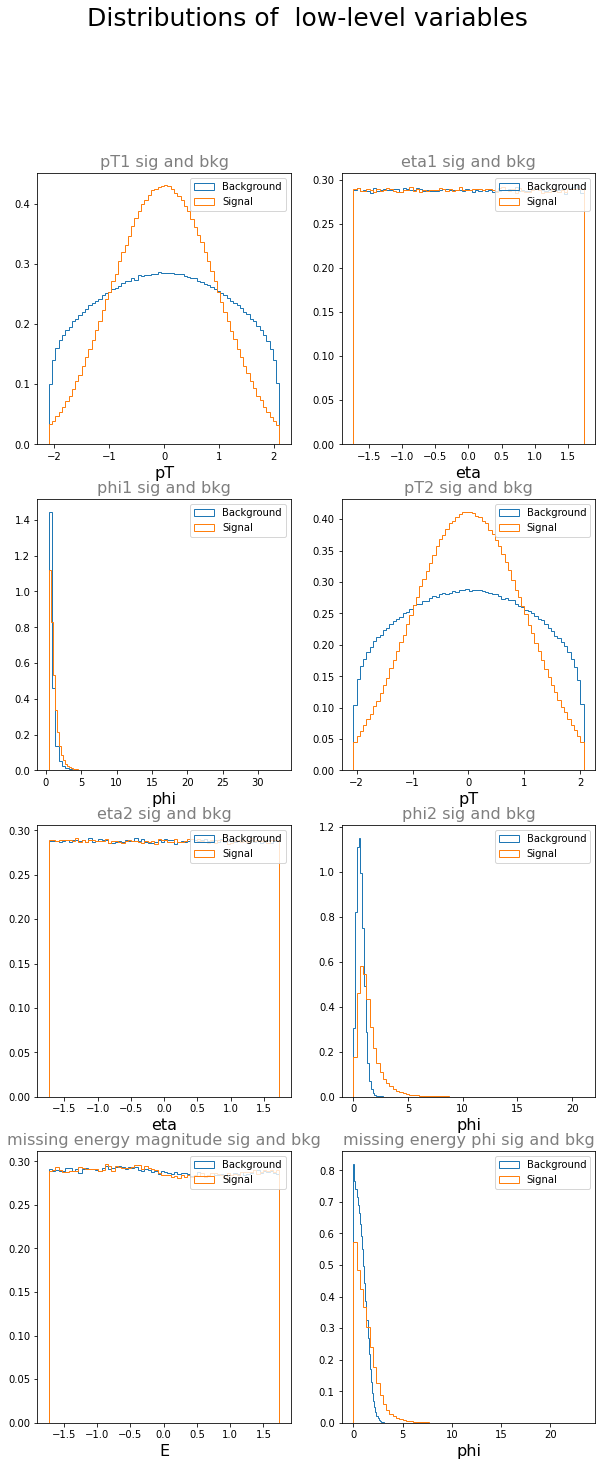

In [4]:
fig, axL = plt.subplots(4,2, figsize=(10,23))
axL[0,0].hist(x[:,1][y==0], density=True,histtype='step', bins=70, label='Background')
axL[0,0].hist(x[:,1][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[0,0].set_title("pT1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[0,0].set_xlabel('pT',  fontsize = 16, color = 'black', alpha = 1)


axL[0,1].hist(x[:,2][y==0], density=True,histtype='step', bins=70, label='Background')
axL[0,1].hist(x[:,2][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[0,1].set_title("eta1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[0,1].set_xlabel('eta',  fontsize = 16, color = 'black', alpha = 1)

axL[1,0].hist(x[:,3][y==0], density=True,histtype='step', bins=70, label='Background')
axL[1,0].hist(x[:,3][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[1,0].set_title("phi1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[1,0].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

axL[1,1].hist(x[:,4][y==0], density=True,histtype='step', bins=70, label='Background')
axL[1,1].hist(x[:,4][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[1,1].set_title("pT2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[1,1].set_xlabel('pT',  fontsize = 16, color = 'black', alpha = 1)

axL[2,0].hist(x[:,5][y==0], density=True,histtype='step', bins=70, label='Background')
axL[2,0].hist(x[:,5][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[2,0].set_title("eta2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[2,0].set_xlabel('eta',  fontsize = 16, color = 'black', alpha = 1)


axL[2,1].hist(x[:,6][y==0], density=True,histtype='step', bins=70, label='Background')
axL[2,1].hist(x[:,6][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[2,1].set_title("phi2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[2,1].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

axL[3,0].hist(x[:,7][y==0], density=True,histtype='step', bins=70, label='Background')
axL[3,0].hist(x[:,7][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[3,0].set_title("missing energy magnitude sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[3,0].set_xlabel('E',  fontsize = 16, color = 'black', alpha = 1)

axL[3,1].hist(x[:,8][y==0], density=True,histtype='step', bins=70, label='Background')
axL[3,1].hist(x[:,8][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[3,1].set_title("missing energy phi sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[3,1].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

plt.suptitle('Distributions of  low-level variables', fontsize=25)
axL[0,0].legend()
axL[0,1].legend()
axL[1,0].legend()
axL[1,1].legend()
axL[2,0].legend()
axL[2,1].legend()
axL[3,0].legend()
axL[3,1].legend()



plt.show()


The alghortims which i want to test are a Boosted Decision Three and a Shallow Neural Network. 
I define the training set, the validation set and the test one; the validation set will be useful to control if the model is a good one or if it under/overfits.

Scaling the dataset helps in regularize the models and in order to facilitate the comparison between them.

In [24]:
class_counts= df.groupby('class label').size()
print(class_counts)



#all
x_train, x_test, y_train, y_test = train_test_split(x,y,
                            test_size=0.4,
                             random_state=42, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42, stratify=y_train)

#Scale the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


#low-level features
xL_train=x_train[:,:8]

xL_test=x_test[:,:8]

xL_val=x_val[:,:8]

#high-level features
xH_train=x_train[:,8:]

xH_test=x_test[:,8:]

xH_val=x_val[:,8:]


class label
0.0    2712173
1.0    2287827
dtype: int64


The dataset is fairly balanced between signal and background events.

# 1) BDT with XGBoost

In [6]:
# I use xgboost to build up my model, hence i build two matrices for train and test.
dtrain = xgb.DMatrix(x_train,y_train)
dval = xgb.DMatrix(x_val,y_val)
dtest = xgb.DMatrix(x_test,y_test)

dtrainL = xgb.DMatrix(xL_train,y_train)
dvalL = xgb.DMatrix(xL_val,y_val)
dtestL = xgb.DMatrix(xL_test,y_test)

dtrainH = xgb.DMatrix(xH_train,y_train)
dvalH = xgb.DMatrix(xH_val,y_val)
dtestH = xgb.DMatrix(xH_test,y_test)

I need to find the best parameters in order to have the best model which minimize the error. To do that i perform cross validation trying different values of parameters in selected ranges. All the hyper-parameter tuning methods were done considering the dataset with all the features, both for BDT and NN. Then the train is made separately on the three different sets.

I start searching for max_depth, min_child_weight which helps in fixing the complexity and controlling overfit of the model. I'll consider the dataset with all the variables.

In [ ]:
param = { }
param['objective'] ='binary:logistic' #good for classification
param['eval_metric'] = "error"
num_round = 70

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(8,11) # i saw that 15 makes it to overfit, after some rounds the error starts to increase
    for min_child_weight in range(6,8)
]
# Define initial best params and error
min_err = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
# Update our parameters
    param['max_depth'] = max_depth
    param['min_child_weight'] = min_child_weight
# Run CV
    cv_results = xgb.cv(
        param,
        dtrain,
        num_boost_round=num_round,
        seed=42,
        nfold=3, # 5 was too long, choose this beacause the sample is large and it takes too much time
        metrics={'error'},
        early_stopping_rounds=6
    )
# Update best error
    mean_err = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError: {} for {} rounds".format(mean_err, boost_rounds))
    if mean_err < min_err:
        min_err = mean_err
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_err)) 

CV with max_depth=8, min_child_weight=6

        Error: 0.19779233333333335 for 41 rounds
        
CV with max_depth=8, min_child_weight=7
        
        Error: 0.19782666666666668 for 37 rounds
        
CV with max_depth=9, min_child_weight=6
        
        Error: 0.19779233333333335 for 31 rounds
        
CV with max_depth=9, min_child_weight=7
        
        Error: 0.19772333333333333 for 46 rounds
        
CV with max_depth=10, min_child_weight=6
        
        Error: 0.19784933333333332 for 28 rounds
        
CV with max_depth=10, min_child_weight=7
        
        Error: 0.197859 for 37 rounds
        
Best params: 9, 7, Error: 0.19772333333333333

Hence i save these best parmeters and with another cross validation i find the best learning rate:

In [ ]:
min_err = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    param={}
    param['max_depth'] = 9
    param['min_child_weight'] = 6
    param['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            param,
            dtrain,
            num_boost_round=70,
            seed=42,
            nfold=3,
            metrics=['error'],
            early_stopping_rounds=6
          )
    # Update best score
    mean_err = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_err, boost_rounds))
    if mean_err < min_err:
        min_err = mean_err
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_err))

CV with eta=0.3
        
        Error 0.19779233333333335 for 31 rounds

CV with eta=0.2
        
        Error 0.19726033333333334 for 61 rounds

CV with eta=0.1
        
        Error 0.19706733333333334 for 68 rounds

CV with eta=0.05
       
        Error 0.19823266666666664 for 69 rounds

Best params: 0.1, Error: 0.19706733333333334

----------------------------------------------------------------------------------------------------------------

Now that i have found the best parameters, i complete the study of my model with a final CV wth all the parameters chosen, using th validation set. 
I select now as a metric the AUC as is a good choice for classification problems and it is the one that i will use to compare the BDT and the NN alghoritms. 

In [7]:
param = {'max_depth': 9, 'eta': 0.1, "min_child_weight": 7}
param['objective'] ='binary:logistic' 
param['eval_metric'] = "auc" 
num_round = 70 
# Run CV
cv_final = xgb.cv(
        param,
        dval,
        num_boost_round=num_round,
        seed=42,
        nfold=3, # 5 was too long, choose this beacause the sample is large and it takes less time
        metrics={'auc'},
        early_stopping_rounds=6
    )
print(cv_final)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.861968       0.000561       0.856009      0.000321
1         0.866549       0.000713       0.860416      0.000274
2         0.869169       0.000543       0.862758      0.000340
3         0.870593       0.000320       0.864037      0.000475
4         0.871879       0.000311       0.865005      0.000575
..             ...            ...            ...           ...
65        0.890143       0.000083       0.875067      0.000349
66        0.890226       0.000095       0.875072      0.000348
67        0.890349       0.000041       0.875076      0.000338
68        0.890483       0.000063       0.875088      0.000323
69        0.890628       0.000132       0.875101      0.000310

[70 rows x 4 columns]


I have now the best model for the BDT considering all the variables, hence i can train and test it. I use early stopping to control the number of trees and avoid overfitting.

In [7]:
evallist = [(dval, 'eval'), (dtrain, 'train')]
param = [('max_depth', 9), ('eta', 0.1) , ("min_child_weight", 7),('eval_metric', "auc"), ('eval_metric', "logloss"), ('objective', 'binary:logistic')]
progress = dict()
num_round = 150 #low eta means larger num_round
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=6, evals_result=progress)


[0]	eval-auc:0.85750	eval-logloss:0.65418	train-auc:0.85918	train-logloss:0.65379
Multiple eval metrics have been passed: 'train-logloss' will be used for early stopping.

Will train until train-logloss hasn't improved in 6 rounds.
[1]	eval-auc:0.86142	eval-logloss:0.62235	train-auc:0.86313	train-logloss:0.62185
[2]	eval-auc:0.86342	eval-logloss:0.59553	train-auc:0.86515	train-logloss:0.59481
[3]	eval-auc:0.86451	eval-logloss:0.57325	train-auc:0.86628	train-logloss:0.57243
[4]	eval-auc:0.86528	eval-logloss:0.55437	train-auc:0.86707	train-logloss:0.55345
[5]	eval-auc:0.86611	eval-logloss:0.53817	train-auc:0.86794	train-logloss:0.53690
[6]	eval-auc:0.86666	eval-logloss:0.52444	train-auc:0.86856	train-logloss:0.52309
[7]	eval-auc:0.86730	eval-logloss:0.51258	train-auc:0.86924	train-logloss:0.51100
[8]	eval-auc:0.86778	eval-logloss:0.50232	train-auc:0.86977	train-logloss:0.50054
[9]	eval-auc:0.86822	eval-logloss:0.49356	train-auc:0.87025	train-logloss:0.49171
[10]	eval-auc:0.86877	eval-log

[98]	eval-auc:0.87676	eval-logloss:0.42584	train-auc:0.88270	train-logloss:0.41566
[99]	eval-auc:0.87676	eval-logloss:0.42583	train-auc:0.88273	train-logloss:0.41560
[100]	eval-auc:0.87676	eval-logloss:0.42583	train-auc:0.88275	train-logloss:0.41557
[101]	eval-auc:0.87675	eval-logloss:0.42583	train-auc:0.88279	train-logloss:0.41552
[102]	eval-auc:0.87676	eval-logloss:0.42583	train-auc:0.88281	train-logloss:0.41548
[103]	eval-auc:0.87675	eval-logloss:0.42583	train-auc:0.88283	train-logloss:0.41545
[104]	eval-auc:0.87675	eval-logloss:0.42583	train-auc:0.88289	train-logloss:0.41536
[105]	eval-auc:0.87677	eval-logloss:0.42581	train-auc:0.88298	train-logloss:0.41524
[106]	eval-auc:0.87678	eval-logloss:0.42578	train-auc:0.88300	train-logloss:0.41520
[107]	eval-auc:0.87679	eval-logloss:0.42577	train-auc:0.88308	train-logloss:0.41508
[108]	eval-auc:0.87679	eval-logloss:0.42577	train-auc:0.88312	train-logloss:0.41502
[109]	eval-auc:0.87679	eval-logloss:0.42576	train-auc:0.88313	train-logloss:0.

In [8]:
y_pred = bst.predict(dtest)
print(roc_auc_score(y_test,y_pred))

0.8766896856362949


Let's now mantein the same hyperparameters but on the low-features dataset and later on the high-features one. I want to see to what extent the third dataset add information which helps the algorithm in the learning step.

In [9]:
evallist = [(dvalL, 'eval'), (dtrainL, 'train')]
param = [('max_depth', 9), ('eta', 0.1) , ("min_child_weight", 7),('eval_metric', "auc"), ('eval_metric', "logloss"), ('objective', 'binary:logistic')]
progressL = dict()
num_round = 150 #low eta means larger num_round

bstL = xgb.train(param, dtrainL, num_round, evallist, early_stopping_rounds=6, evals_result=progressL)


[0]	eval-auc:0.84961	eval-logloss:0.65629	train-auc:0.85134	train-logloss:0.65616
Multiple eval metrics have been passed: 'train-logloss' will be used for early stopping.

Will train until train-logloss hasn't improved in 6 rounds.
[1]	eval-auc:0.85174	eval-logloss:0.62589	train-auc:0.85338	train-logloss:0.62551
[2]	eval-auc:0.85290	eval-logloss:0.60094	train-auc:0.85452	train-logloss:0.60039
[3]	eval-auc:0.85364	eval-logloss:0.58003	train-auc:0.85529	train-logloss:0.57933
[4]	eval-auc:0.85411	eval-logloss:0.56246	train-auc:0.85579	train-logloss:0.56167
[5]	eval-auc:0.85439	eval-logloss:0.54755	train-auc:0.85611	train-logloss:0.54648
[6]	eval-auc:0.85477	eval-logloss:0.53492	train-auc:0.85652	train-logloss:0.53373
[7]	eval-auc:0.85498	eval-logloss:0.52412	train-auc:0.85679	train-logloss:0.52274
[8]	eval-auc:0.85529	eval-logloss:0.51474	train-auc:0.85710	train-logloss:0.51328
[9]	eval-auc:0.85554	eval-logloss:0.50683	train-auc:0.85738	train-logloss:0.50535
[10]	eval-auc:0.85577	eval-log

[98]	eval-auc:0.86893	eval-logloss:0.43948	train-auc:0.87462	train-logloss:0.43053
[99]	eval-auc:0.86914	eval-logloss:0.43910	train-auc:0.87488	train-logloss:0.43006
[100]	eval-auc:0.86914	eval-logloss:0.43909	train-auc:0.87491	train-logloss:0.43001
[101]	eval-auc:0.86914	eval-logloss:0.43908	train-auc:0.87496	train-logloss:0.42995
[102]	eval-auc:0.86924	eval-logloss:0.43891	train-auc:0.87509	train-logloss:0.42971
[103]	eval-auc:0.86944	eval-logloss:0.43856	train-auc:0.87535	train-logloss:0.42925
[104]	eval-auc:0.86946	eval-logloss:0.43851	train-auc:0.87540	train-logloss:0.42916
[105]	eval-auc:0.86950	eval-logloss:0.43844	train-auc:0.87546	train-logloss:0.42906
[106]	eval-auc:0.86958	eval-logloss:0.43831	train-auc:0.87556	train-logloss:0.42888
[107]	eval-auc:0.86959	eval-logloss:0.43829	train-auc:0.87560	train-logloss:0.42883
[108]	eval-auc:0.86959	eval-logloss:0.43828	train-auc:0.87562	train-logloss:0.42879
[109]	eval-auc:0.86967	eval-logloss:0.43816	train-auc:0.87574	train-logloss:0.

In [10]:
y_predL = bstL.predict(dtestL)
print(roc_auc_score(y_test,y_predL))

0.8710302176130577


In [11]:
evallist = [(dvalH, 'eval'), (dtrainH, 'train')]
param = [('max_depth', 9), ('eta', 0.1) , ("min_child_weight", 7),('eval_metric', "auc"), ('eval_metric', "logloss"), ('objective', 'binary:logistic')]
progressH = dict()
num_round = 150 #low eta means larger num_round
bstH = xgb.train(param, dtrainH, num_round, evallist, early_stopping_rounds=6, evals_result=progressH)


[0]	eval-auc:0.84633	eval-logloss:0.65622	train-auc:0.84734	train-logloss:0.65594
Multiple eval metrics have been passed: 'train-logloss' will be used for early stopping.

Will train until train-logloss hasn't improved in 6 rounds.
[1]	eval-auc:0.85084	eval-logloss:0.62546	train-auc:0.85197	train-logloss:0.62518
[2]	eval-auc:0.85214	eval-logloss:0.60025	train-auc:0.85332	train-logloss:0.59973
[3]	eval-auc:0.85310	eval-logloss:0.57926	train-auc:0.85429	train-logloss:0.57876
[4]	eval-auc:0.85426	eval-logloss:0.56125	train-auc:0.85551	train-logloss:0.56045
[5]	eval-auc:0.85476	eval-logloss:0.54598	train-auc:0.85603	train-logloss:0.54504
[6]	eval-auc:0.85547	eval-logloss:0.53310	train-auc:0.85679	train-logloss:0.53202
[7]	eval-auc:0.85631	eval-logloss:0.52182	train-auc:0.85769	train-logloss:0.52063
[8]	eval-auc:0.85655	eval-logloss:0.51244	train-auc:0.85793	train-logloss:0.51108
[9]	eval-auc:0.85716	eval-logloss:0.50413	train-auc:0.85858	train-logloss:0.50267
[10]	eval-auc:0.85739	eval-log

[98]	eval-auc:0.86516	eval-logloss:0.44247	train-auc:0.86868	train-logloss:0.43588
[99]	eval-auc:0.86516	eval-logloss:0.44247	train-auc:0.86870	train-logloss:0.43585
[100]	eval-auc:0.86516	eval-logloss:0.44247	train-auc:0.86870	train-logloss:0.43583
[101]	eval-auc:0.86518	eval-logloss:0.44244	train-auc:0.86881	train-logloss:0.43569
[102]	eval-auc:0.86519	eval-logloss:0.44243	train-auc:0.86883	train-logloss:0.43567
[103]	eval-auc:0.86519	eval-logloss:0.44243	train-auc:0.86884	train-logloss:0.43566
[104]	eval-auc:0.86519	eval-logloss:0.44242	train-auc:0.86885	train-logloss:0.43563
[105]	eval-auc:0.86521	eval-logloss:0.44238	train-auc:0.86891	train-logloss:0.43553
[106]	eval-auc:0.86522	eval-logloss:0.44238	train-auc:0.86893	train-logloss:0.43550
[107]	eval-auc:0.86523	eval-logloss:0.44236	train-auc:0.86897	train-logloss:0.43540
[108]	eval-auc:0.86523	eval-logloss:0.44234	train-auc:0.86899	train-logloss:0.43535
[109]	eval-auc:0.86524	eval-logloss:0.44232	train-auc:0.86902	train-logloss:0.

In [12]:
y_predH = bstH.predict(dtestH)
print(roc_auc_score(y_test,y_predH))

0.8653119717060852


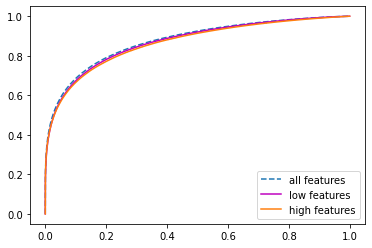

all features AUC: 0.877
low features AUC: 0.871
high features AUC: 0.865


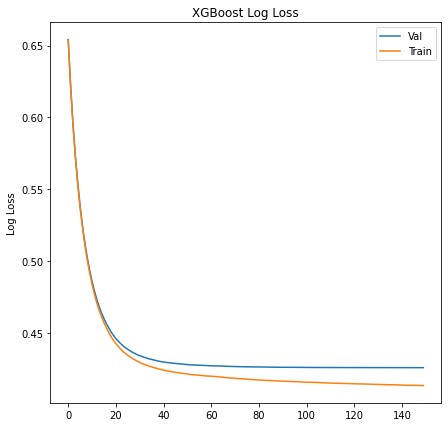

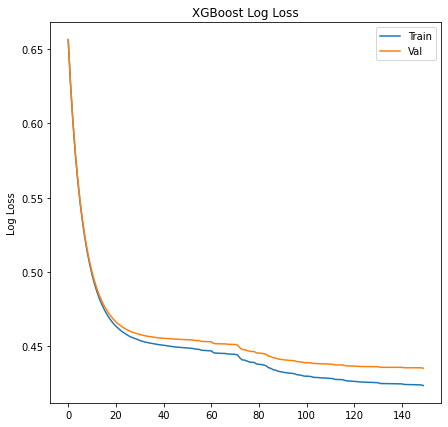

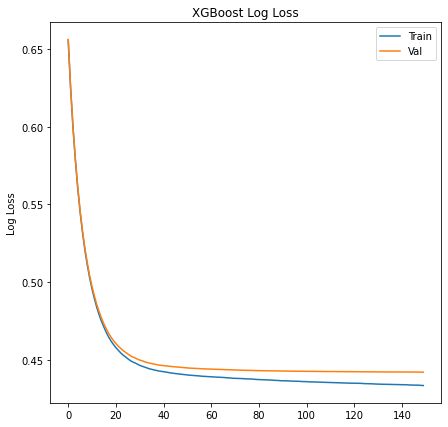

In [13]:
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, y_pred)
fprL, tprL, _ = roc_curve(y_test, y_predL)
fprH, tprH, _ = roc_curve(y_test, y_predH)

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='--', label='all features')
plt.plot(fprL, tprL, color='m', label='low features')
plt.plot(fprH, tprH, label='high features')
# axis labels

# show the legend
plt.legend()
# show the plot
plt.show()

auc = roc_auc_score(y_test, y_pred)
aucL = roc_auc_score(y_test, y_predL)
aucH = roc_auc_score(y_test, y_predH)
print("all features AUC: %.3f" % auc)
print("low features AUC: %.3f" % aucL) 
print("high features AUC: %.3f" % aucH) 


results = progress
x_axis = range(0, 150)

# plot log loss
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_axis, results['eval']['logloss'], label='Val')
ax.plot(x_axis, results['train']['logloss'], label='Train')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

resultsL = progressL
x_axis = range(0, 150)

# plot log loss
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_axis, resultsL['train']['logloss'], label='Train')
ax.plot(x_axis, resultsL['eval']['logloss'], label='Val')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

resultsH = progressH
x_axis = range(0, 150)
# plot log loss
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_axis, resultsH['train']['logloss'], label='Train')
ax.plot(x_axis, resultsH['eval']['logloss'], label='Val')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

As it is possible to see, the high level features seems to give more information to the algorithm with respest to the low level ones, even if in a small extent.

# 2) Shallow NN with Keras

I will follow now the same path traced with the BDT algorithm, hence i define the model using hyperparameters founded with a Randomized Cross Validation on the all-features dataset. I choose the Randomized Search more than the Grid Search beacause it is enough accurate and it is less expensive in terms of time, which, given the high number of events in the dataset, is desirable.

In [ ]:
# Hyperparameters
def build_classifier(optimizer, units):

    NN=Sequential()

    NN.add(Dense(units=units, activation="relu", kernel_initializer="random_uniform", input_dim=18))
    NN.add(Dense(units=1, activation="sigmoid", kernel_initializer="random_uniform"))

    NN.summary()

    

    NN.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    return NN



NN = KerasClassifier(build_fn=build_classifier)

parameters ={'batch_size':[20, 32],
            'nb_epoch':[10,20,50],
            'optimizer':['adam','rmsprop','SGD'],
            'units':[300, 1000, 2000, 10000]
            }

grid_rndm= RandomizedSearchCV(estimator=NN, param_distributions=parameters, scoring='roc_auc', n_iter=20, n_jobs=-1, cv=3)

# tune the hyperparameters via a randomized search
grid_rndm.fit(x_train, y_train)
# evaluate the best randomized searched model on the testing
# data
print("[INFO] grid search AUC: {:.2f}".format(grid_rndm.best_score_))
print("[INFO] randomized search best parameters: {}".format(
	grid_rndm.best_params_)) 

Results:

[INFO] grid search AUC: 0.87


[INFO] randomized search best parameters: {'units': 1000, 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 32}

--------------------------------------------------------------------------------

Given these hyperparameters, after some trials i have found that the best learning rate to use is 0.001, hence i can now train the model on the training dataset with all the features. I use also the validation set in order then to compare the loss of the train set with respect to the validation one.

In order to improve the performance, i modify the alpha value of the relu activation function, such that the problem fo the vanishing gradient is reduced and the model improved. 
The use of a regulariaztion function helps the algorithm to stabilize and work better.

In [25]:
# Hyperparameters
learning_rate=0.001

model = Sequential()

activations.relu(x, alpha=0.1, max_value=None, threshold=0)
model.add(Dense(units=1000, kernel_initializer='he_normal', activation="relu",input_dim=18))
model.add(Dense(units=1, kernel_initializer='random_normal', activation="sigmoid"))

model.summary()

from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename="network.gv", title="Shallow Network")

model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics="AUC")

history = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size=32, epochs=10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              19000     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1001      
Total params: 20,001
Trainable params: 20,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
56250/56250 [==============================] - 85s 2ms/step - loss: 0.4358 - auc: 0.8704 - val_loss: 0.4293 - val_auc: 0.8744
Epoch 2/10
56250/56250 [==============================] - 91s 2ms/step - loss: 0.4294 - auc: 0.8743 - val_loss: 0.4273 - val_auc: 0.8757
Epoch 3/10
56250/56250 [==============================] - 92s 2ms/step - loss: 0.4286 - auc: 0.8748 - val_loss: 0.4288 - val_auc: 0.8755
Epoch 4/10
56250/56250 [==============================] - 86s 2ms/step - loss: 0.4281 - auc: 0.8752 -

I will now train the model using the other two datasets: the low-level and then the high-level one.

In [21]:
# Hyperparameters
learning_rate=0.001

modelL = Sequential()

activations.relu(x, alpha=0.1, max_value=None, threshold=0)
modelL.add(Dense(units=1000, kernel_initializer='he_normal', activation="relu",input_dim=8))
modelL.add(Dense(units=1, kernel_initializer='random_normal', activation="sigmoid"))

modelL.summary()

from ann_visualizer.visualize import ann_viz
ann_viz(modelL, view=True, filename="network.gv", title="Shallow Network")

modelL.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics="AUC")

historyL = modelL.fit(x=xL_train, y=y_train, validation_data=(xL_val, y_val), batch_size=32, epochs=10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              9000      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1001      
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
56250/56250 [==============================] - 86s 2ms/step - loss: 0.4524 - auc: 0.8602 - val_loss: 0.4400 - val_auc: 0.8689A: 1s - loss: 0.4529 - auc - ETA: 1s - los
Epoch 2/10
56250/56250 [==============================] - 89s 2ms/step - loss: 0.4397 - auc: 0.8680 - val_loss: 0.4370 - val_auc: 0.8702
Epoch 3/10
56250/56250 [==============================] - 83s 1ms/step - loss: 0.4378 - auc: 0.8691 - val_loss: 0.4363 - val_auc: 0.8711
Epoch 4/10
56250/56250 [==============================] - 8

In [22]:
# Hyperparameters
learning_rate=0.001

modelH = Sequential()

activations.relu(x, alpha=0.1, max_value=None, threshold=0)
modelH.add(Dense(units=1000, kernel_initializer='he_normal', activation="relu",input_dim=10))
modelH.add(Dense(units=1, kernel_initializer='random_normal', activation="sigmoid"))

modelH.summary()

from ann_visualizer.visualize import ann_viz
ann_viz(modelH, view=True, filename="network.gv", title="Shallow Network")

modelH.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics="AUC")

historyH = modelH.fit(x=xH_train, y=y_train, validation_data=(xH_val, y_val), batch_size=32, epochs=10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1001      
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
56250/56250 [==============================] - 83s 1ms/step - loss: 0.4508 - auc: 0.8597 - val_loss: 0.4479 - val_auc: 0.8620 - loss: 0.4508 - auc
Epoch 2/10
56250/56250 [==============================] - 99s 2ms/step - loss: 0.4448 - auc: 0.8634 - val_loss: 0.4423 - val_auc: 0.8654
Epoch 3/10
56250/56250 [==============================] - 94s 2ms/step - loss: 0.4440 - auc: 0.8640 - val_loss: 0.4432 - val_auc: 0.8648
Epoch 4/10
56250/56250 [==============================] - 87s 2ms/step - loss: 0

Evaluation of the model:

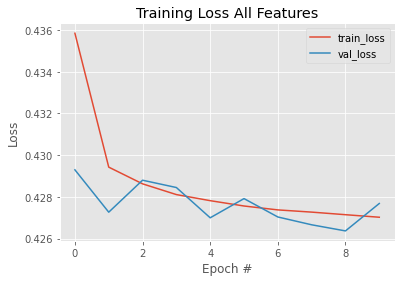

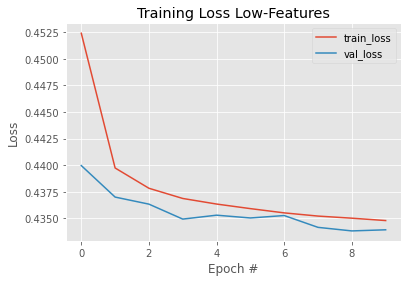

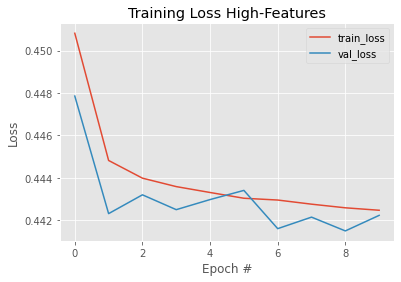

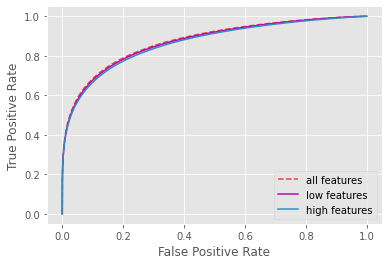

all features AUC: 0.876
low features AUC: 0.872
high features AUC: 0.866


In [26]:
predictions = model.predict(x_test, batch_size=32)
predictionsH = modelH.predict(xH_test, batch_size=32)
predictionsL = modelL.predict(xL_test, batch_size=32)



N = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training Loss All Features")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
NL = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(NL, historyL.history["loss"], label="train_loss")
plt.plot(NL, historyL.history["val_loss"], label="val_loss")
plt.title("Training Loss Low-Features")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
NH = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(NH, historyH.history["loss"], label="train_loss")
plt.plot(NH, historyH.history["val_loss"], label="val_loss")
plt.title("Training Loss High-Features")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.show()
#plt.savefig("training_performance.png")

# calculate roc curves
fprNN, tprNN, _ = roc_curve(y_test, predictions)
fprLNN, tprLNN, _ = roc_curve(y_test, predictionsL)
fprHNN, tprHNN, _ = roc_curve(y_test, predictionsH)


# plot the roc curve for the model
plt.plot(fprNN, tprNN, linestyle='--', label='all features')
plt.plot(fprLNN, tprLNN, color='m', label='low features')
plt.plot(fprHNN, tprHNN, label='high features')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


auc = roc_auc_score(y_test, predictions)
aucL = roc_auc_score(y_test, predictionsL)
aucH = roc_auc_score(y_test, predictionsH)
print("all features AUC: %.3f" % auc)
print("low features AUC: %.3f" % aucL) 
print("high features AUC: %.3f" % aucH) 


Looking at the loss curves, it seems that the validation set is easier to be predicted with respect to the test set. This could be given by different factors which need to be invastigated.

# 3) Conclusion

It is possible now to compare the results of the two different algorithm looking at their AUC. 
BDT:

all features AUC: 0.877
low features AUC: 0.871
high features AUC: 0.865

NN:

all features AUC: 0.876
low features AUC: 0.872
high features AUC: 0.866


These last models are the best out of my trials. I have tried different combinations and techniques as the normalization more than the scaling of the features, but the first brought a worst performance for the neural network, while it did not affect so much the BDT results.
Given the fluctuations of the loss curves of the NN, i have tried to introduce regolarization function. It brought better learning curves but the performance of the BDT worsen (less AUC) with respsect to the final model.

NN with L2 regularization function:
all features AUC: 0.867
low features AUC: 0.857
high features AUC: 0.856

Hence as a final result i get an almost equal performance between the BDT and the NN on all the datasets.

The low-level features add more information with respect to the high ones, which nevertheless helps in improving the learning capability of the algorithm (higher AUC for all-features dataset).
